In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##### scheduled_charter 	:
- S-- Scheduled
- C-- Charter

In [3]:
def count(var):
    val=var.value_counts()
    return val
def unique(variable):
    value=variable.unique()
    return value

#for Numerical
def fillna_numerical(var):
    value=var.fillna(var.mean(),inplace=True)
    return value
#for categorical
def fillna_cat(var):
    value=var.fillna(var.mode(),inplace=True)



In [4]:
data.shape

(344, 7)

In [5]:
unique(data['species'])

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
unique(data['island'])

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

- Checking null values

In [7]:
data.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [8]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- We will fill the missing numerical columns with mean and categorical with mode.

In [10]:
fillna_numerical(data['culmen_length_mm'])
fillna_numerical(data['flipper_length_mm'])
fillna_numerical(data['body_mass_g'])
fillna_numerical(data['culmen_depth_mm'])

In [11]:
fillna_cat(data['sex'])

- We arecleare and good to go

In [12]:
count(data['species'])

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [13]:
count(data['sex'])

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [14]:
data[data['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
data=data.drop(index=336)

In [16]:
pallete=['deep','muted','bright','dark','colorblind','Paired','husl','Set1','Set2','Set3','Dark2', 'Teal']

In [17]:
def countplot(var):
    value=sns.countplot(var,data=data,palette=random.choice(pallete))
    return value

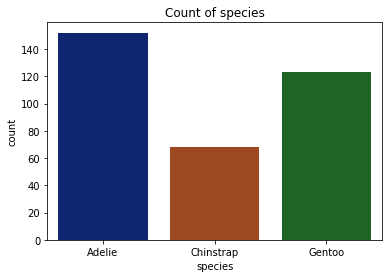

In [18]:
countplot(data['species'])
plt.title('Count of species')
plt.show()

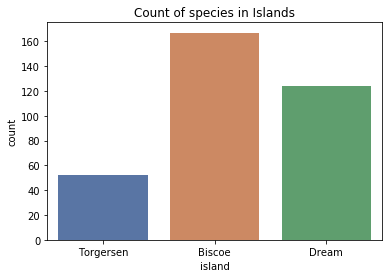

In [19]:
countplot(data['island'])
plt.title('Count of species in Islands')
plt.show()

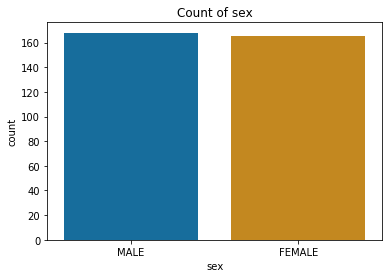

In [20]:
countplot(data['sex'])
plt.title('Count of sex')
plt.show()

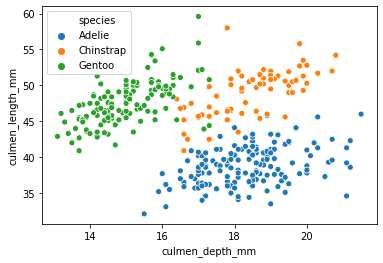

In [21]:
sns.scatterplot(x='culmen_depth_mm',y='culmen_length_mm',data=data,hue='species')

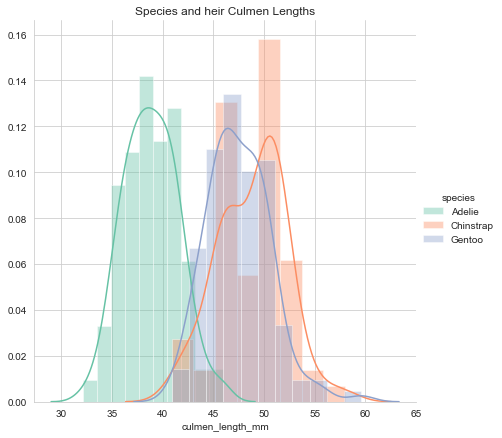

In [23]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='species',palette=random.choice(pallete),height=6).map(sns.distplot,'culmen_length_mm').add_legend()
plt.title('Species and heir Culmen Lengths')
plt.show()

- Adelie is distinguished from all three.
- For Adelie the culmen length starts from 33 but for other two it starts from around 41
- Gentoo's culmen lenght ranges from 41 to 56 whith only one above 56 while Chinstrap ranges from 41 to  57.


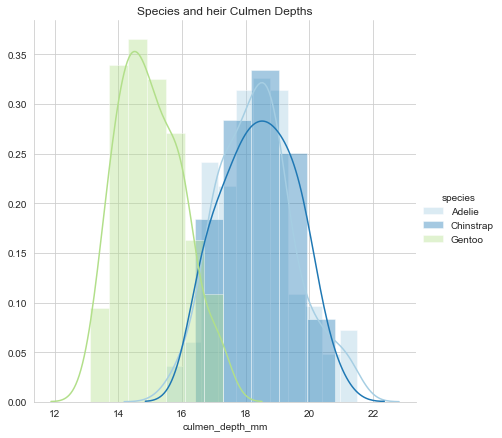

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='species',palette=random.choice(pallete),height=6).map(sns.distplot,'culmen_depth_mm').add_legend()
plt.title('Species and heir Culmen Depths')
plt.show()

- Culmen depth of Gentoo is more seperable while that of Adelie and Chinstrap overlaps.
- Culmen depth of Gentoo started from around 13.5 and ended with 17 while that of Adelie started from 15.8 and ended around 21.7.
- Chinstrap's culmen length started from 16.5 and ended at 20.5

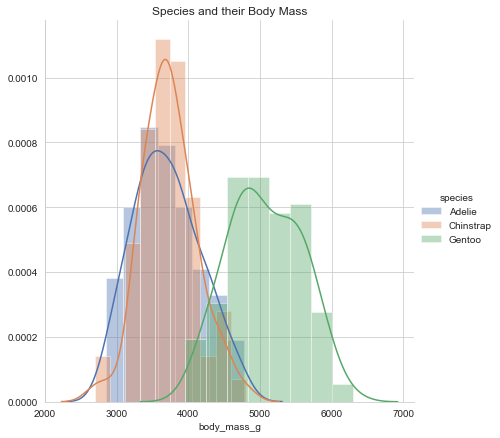

In [26]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='species',palette=random.choice(pallete),height=6).map(sns.distplot,'body_mass_g').add_legend()
plt.title('Species and their Body Mass')
plt.show()

- Gentoo's body mass is more seprable and ranges from 4000 to 6200 g.
- The body masss of Adelie and Chinstrap overlapped.

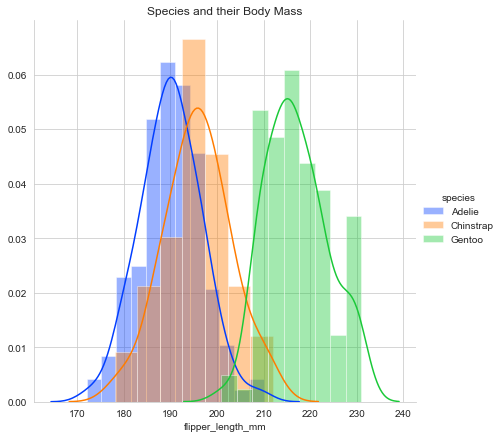

In [27]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='species',palette=random.choice(pallete),height=6).map(sns.distplot,'flipper_length_mm').add_legend()
plt.title('Species and their Body Mass')
plt.show()

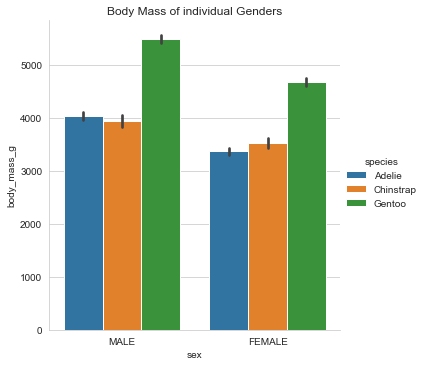

In [28]:
sns.catplot(x='sex',y='body_mass_g',kind='bar',height=5,data=data,hue='species')
plt.title('Body Mass of individual Genders')
plt.show()

- Males have higher body mass when compared to Females. 
- I have left the unknown as it is

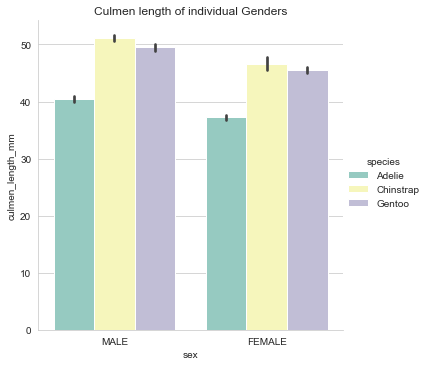

In [29]:
sns.catplot(x='sex',y='culmen_length_mm',kind='bar',height=5,data=data,palette=random.choice(pallete),hue='species')
plt.title('Culmen length of individual Genders')
plt.show()

- Culmen length is highest in Chistrap in both males and females folled by Gento and Adelie

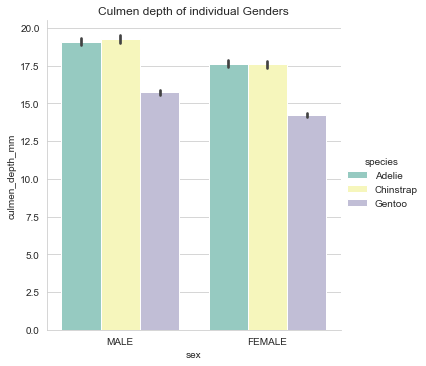

In [30]:
sns.catplot(x='sex',y='culmen_depth_mm',kind='bar',height=5,data=data,palette=random.choice(pallete),hue='species')
plt.title('Culmen depth of individual Genders')
plt.show()

- Culmen depth is slighly more (looks almost equal) in Adlie and Chinstrap while Gentoo is lowest of all.

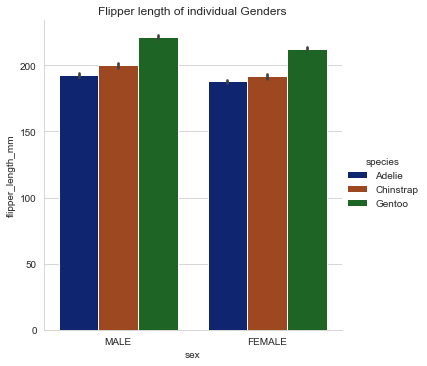

In [31]:

sns.catplot(x='sex',y='flipper_length_mm',kind='bar',height=5,data=data,palette=random.choice(pallete),hue='species')
plt.title('Flipper length of individual Genders')
plt.show()

- Overall when looked into the graph it looks like Gento has higher fliper lenght and can be distinguished while Chinstrap looks little bit higher in both males and females.

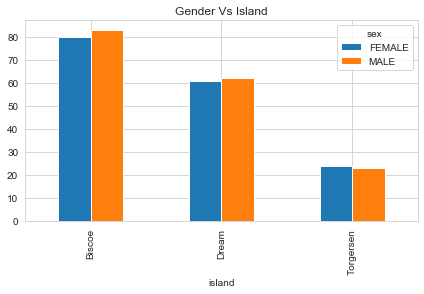

In [32]:
pd.crosstab(data['island'],data['sex']).plot.bar()
plt.tight_layout()
plt.title('Gender Vs Island')
plt.show()

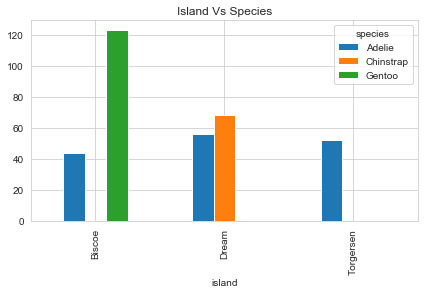

In [33]:
pd.crosstab(data['island'],data['species']).plot.bar()
plt.tight_layout()
plt.title('Island Vs Species')
plt.show()

- Interestingly what we have here is looking like territorial claims between penguins.
- All the penguins of Gentoo spices lived in Biscoe only.
    - All the penguins of Chinstrap lived in Gream island only.
    - The Adelie lived in all the three islands and as only habitate of Torgersen Island.

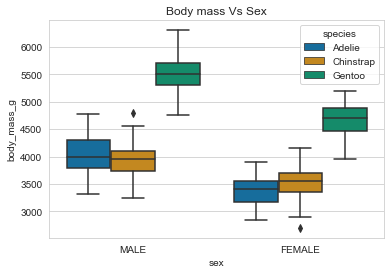

In [34]:
sns.boxplot(x = data.sex, y = data.body_mass_g, hue = data.species, 
            palette=random.choice(pallete))
plt.title('Body mass Vs Sex')
plt.show()

- The body mass of male penguins looks higher than that of Female penguins.
- In bothe the genders Gentoo species has much higher body mass when compared to other two.
- Females of chinstrap have higher body mass than their counter parts.